In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing datasets
db1 = pd.read_csv(r"C:\Users\user\Downloads\archive (6)\fraudTest.csv")
db2 = pd.read_csv(r"C:\Users\user\Downloads\archive (6)\fraudTrain.csv")

In [3]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [4]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
print(db1.shape)
print(db2.shape)

(555719, 23)
(1296675, 23)


In [6]:
print(db1.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [7]:
print(db2.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [8]:
print(db1.dtypes)

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [9]:
print(db2.dtypes)

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


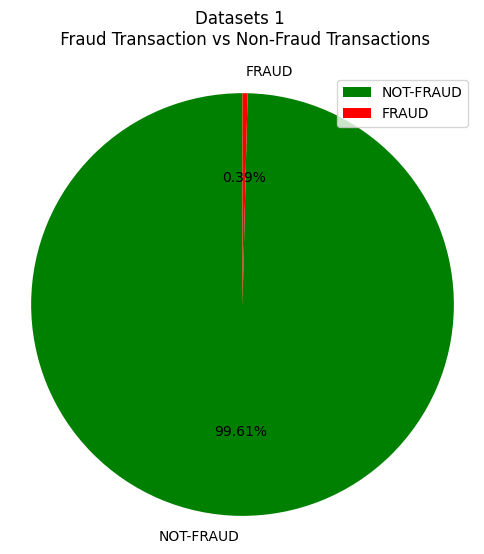

In [16]:
# Showing the occurances of fraud and non-fraud transactions for Datasets 1
fraud_counts = db1['is_fraud'].value_counts()

# Using pie chart method
plt.figure ( figsize = (6,6))
plt.pie ( fraud_counts, labels = ['NOT-FRAUD', 'FRAUD'], autopct = '%1.2f%%', startangle = 90, colors = ['green', 'red'])
plt.legend()
plt.title ('Datasets 1 \n Fraud Transaction vs Non-Fraud Transactions\n')
plt.axis ('equal')
plt.show()

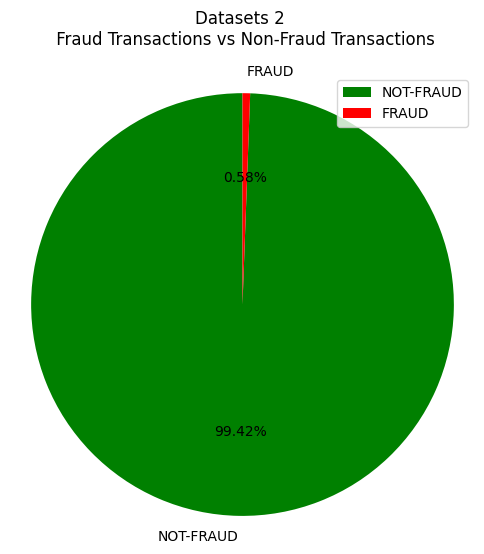

In [17]:
# Showing the occurances of fraud and non-fraud transactions for Datasets 2
fraud_counts = db2['is_fraud'].value_counts()

# Using pie chart method
plt.figure ( figsize = (6,6))
plt.pie ( fraud_counts, labels = ['NOT-FRAUD', 'FRAUD'], autopct = '%1.2f%%', startangle = 90, colors = ['green', 'red'])
plt.legend()
plt.title ('Datasets 2 \n Fraud Transactions vs Non-Fraud Transactions\n')
plt.axis ('equal')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [19]:
y = db1['is_fraud']
x = db1.drop(columns = ['is_fraud', 'amt', 'cc_num'])

# Now using labelencoder to encode categorical columns
le = LabelEncoder()
for col in x.select_dtypes (include ='object'):
    x[col] = le.fit_transform(x[col])

In [20]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =645)

In [21]:
lr = LogisticRegression(random_state =645)
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [22]:
# Model accuracy
print("\n Logistic Regression accuracy for dataset 1\n")
print(" Logistic Regression Accuracy \n", accuracy_score(y_test, y_pred_lr))
p_lr = precision_score(y_test, y_pred_lr)
print(" Logistic Regression Precision \n",p_lr )
print(" Logistic Regression Recall \n", recall_score(y_test, y_pred_lr))
print(" Logistic Regression F1-Score \n", f1_score(y_test, y_pred_lr))
c_m_lr = confusion_matrix(y_test, y_pred_lr)
print(" Logistic Regression Confusion Matrix \n", c_m_lr )


 Logistic Regression accuracy for dataset 1

 Logistic Regression Accuracy 
 0.9962571078960628
 Logistic Regression Precision 
 0.0
 Logistic Regression Recall 
 0.0
 Logistic Regression F1-Score 
 0.0
 Logistic Regression Confusion Matrix 
 [[110728      0]
 [   416      0]]


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


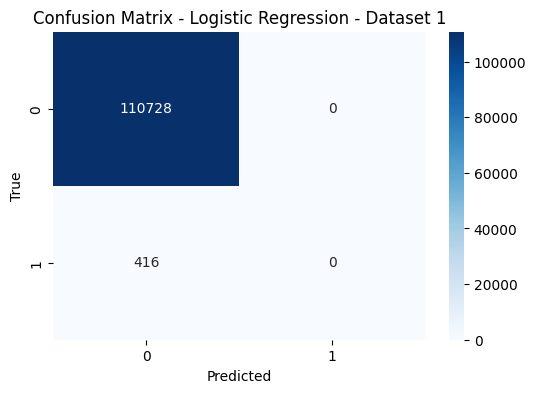

In [28]:
# Plotting the confusion matrix heatmap for Logistic Regression
plt.figure(figsize = (6,4))
sns.heatmap(c_m_lr, annot=True, fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression - Dataset 1")
plt.show()

In [29]:
x = db2.drop(columns = ['is_fraud', 'amt', 'cc_num'])
y = db2['is_fraud']

In [30]:
#  using labelencoder to encode categorical columns
for col in x.select_dtypes(include='object'):
    x[col] = le.fit_transform(x[col])

In [31]:
# Model accuracy
print("\n Logistic Regression accuracy for dataset 2\n")
print(" Logistic Regression Accuracy :\n", accuracy_score(y_test, y_pred_lr))
p_lr = precision_score(y_test, y_pred_lr)
print(" Logistic Regression Precision :\n",p_lr )
print(" Logistic Regression Recall :\n", recall_score(y_test, y_pred_lr))
print(" Logistic Regression F1-Score :\n", f1_score(y_test, y_pred_lr))
c_m_lr = confusion_matrix(y_test, y_pred_lr)
print(" Logistic Regression Confusion Matrix :\n", c_m_lr )


 Logistic Regression accuracy for dataset 2

 Logistic Regression Accuracy :
 0.9962571078960628
 Logistic Regression Precision :
 0.0
 Logistic Regression Recall :
 0.0
 Logistic Regression F1-Score :
 0.0
 Logistic Regression Confusion Matrix :
 [[110728      0]
 [   416      0]]


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


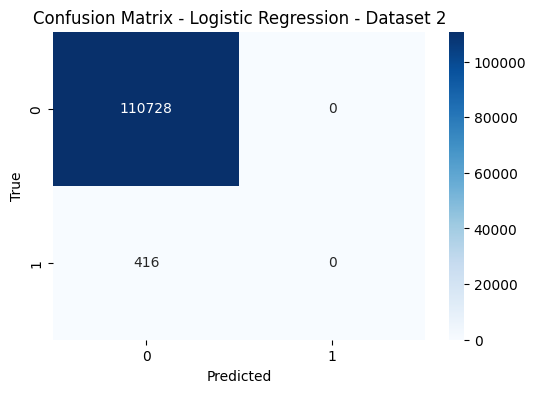

In [32]:
# Plotting the confusion matrix heatmap for Logistic Regression
plt.figure(figsize = (6,4))
sns.heatmap(c_m_lr,annot=True, fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression - Dataset 2")
plt.show()

In [33]:
x = db1.drop( columns = ['is_fraud', 'amt', 'cc_num'])
y = db1['is_fraud']

In [34]:
# Now using labelencoder to encode categorical columns
for col in x.select_dtypes(include='object'):
    x[col] = le.fit_transform(x[col])

In [35]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 645)

In [36]:
dt = DecisionTreeClassifier(random_state = 645)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [38]:
# Model accuracy
print("\n Decision Tree accuracy for dataset 1\n")

print(" DecisionTree Accuracy :\n", accuracy_score(y_test, y_pred_dt))

p_dt = precision_score(y_test, y_pred_dt)
print("\n Decision Tree Precision :\n",p_dt )

print("\n Decision Tree Recall :\n", recall_score(y_test, y_pred_dt))

print(" \nDecision Tree F1-Score :\n", f1_score(y_test, y_pred_dt))

c_m_dt = confusion_matrix(y_test, y_pred_dt)
print(" \nDecision Tree Confusion Matrix :\n", c_m_dt )


 Decision Tree accuracy for dataset 1

 DecisionTree Accuracy :
 0.9938818109839488

 Decision Tree Precision :
 0.22151898734177214

 Decision Tree Recall :
 0.25240384615384615
 
Decision Tree F1-Score :
 0.23595505617977527
 
Decision Tree Confusion Matrix :
 [[110359    369]
 [   311    105]]


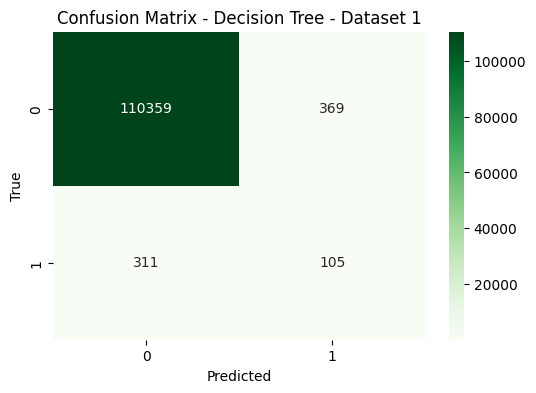

In [39]:
# Plotting the confusion matrix heatmap for Logistic Regression
plt.figure(figsize = (6,4))
sns.heatmap(c_m_dt,annot=True, fmt="d",cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Decision Tree - Dataset 1")
plt.show()

In [40]:
x = db2.drop(columns = ['is_fraud', 'amt','cc_num'])
y = db2['is_fraud']

# Now using labelencoder to encode categorical columns
for col in x.select_dtypes(include='object'):
    x[col] = le.fit_transform(x[col])

In [41]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =654)

In [42]:
dt = DecisionTreeClassifier(random_state = 654)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [43]:
# Model accuracy
print("\n Decision Tree accuracy for dataset 2\n")

print(" DecisionTree Accuracy :\n", accuracy_score(y_test, y_pred_dt))

p_dt = precision_score(y_test, y_pred_dt)
print("\n Decision Tree Precision :\n",p_dt )

print("\n Decision Tree Recall :\n", recall_score(y_test, y_pred_dt))

print(" \nDecision Tree F1-Score :\n", f1_score(y_test, y_pred_dt))

c_m_dt = confusion_matrix(y_test, y_pred_dt)
print(" \nDecision Tree Confusion Matrix :\n", c_m_dt )


 Decision Tree accuracy for dataset 2

 DecisionTree Accuracy :
 0.990907513447857

 Decision Tree Precision :
 0.23640806353084912

 Decision Tree Recall :
 0.2588628762541806
 
Decision Tree F1-Score :
 0.2471264367816092
 
Decision Tree Confusion Matrix :
 [[256590   1250]
 [  1108    387]]


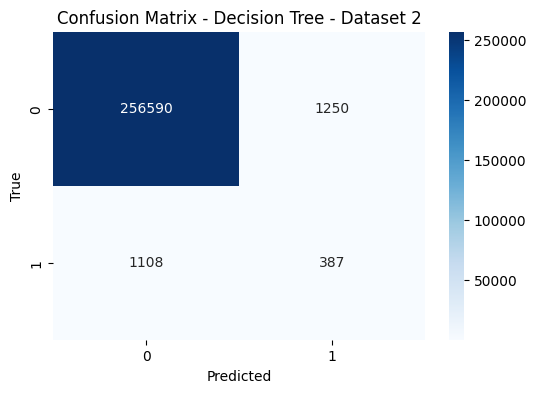

In [44]:
# Plotting the confusion matrix heatmap for Logistic Regression
plt.figure(figsize = (6,4))
sns.heatmap(c_m_dt,annot=True, fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Decision Tree - Dataset 2")
plt.show()